In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('SBIN.NS.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.651093,43733533.0
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.248409,56167280.0
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.921828,68296318.0
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.880607,86073880.0
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.814024,76613039.0


In [4]:
df.iloc[:, 4:5]

,Close
0,18.823240
1,18.224106
2,17.738192
3,17.676863
4,17.577793
...,...
6768,599.049988
6769,602.700012
6770,598.099976
6771,599.099976


In [5]:
import datetime

In [6]:
print(datetime.datetime.now().date())

2022-12-11


In [7]:
df.iloc[-61:]

,Date,Open,High,Low,Close,Adj Close,Volume
6712,2022-08-25,521.950012,528.299988,518.500000,520.400024,520.400024,15473450.0
6713,2022-08-26,523.799988,529.500000,522.200012,523.799988,523.799988,12855886.0
6714,2022-08-29,511.299988,517.000000,508.750000,514.849976,514.849976,9421339.0
6715,2022-08-30,518.200012,532.500000,517.950012,531.250000,531.250000,14835308.0
6716,2022-09-01,522.250000,540.900024,522.250000,533.299988,533.299988,16670228.0
...,...,...,...,...,...,...,...
6768,2022-11-17,599.099976,602.750000,596.150024,599.049988,599.049988,8167131.0
6769,2022-11-18,601.000000,605.750000,597.150024,602.700012,602.700012,12933675.0
6770,2022-11-21,602.099976,602.099976,595.349976,598.099976,598.099976,7412419.0
6771,2022-11-22,598.150024,600.700012,596.150024,599.099976,599.099976,8048595.0


In [8]:
from stock_prediction import StockPrediction

In [9]:
df = df.dropna()

In [51]:
df_test = df.iloc[:-20]

In [52]:
from tensorflow.keras.models import load_model
model = load_model('test_model.h5')

In [53]:
sp = StockPrediction(model, df_test)

In [54]:
weekly_result = sp.continuous_weekly_prediction()

1/1 [==============================] - 0s 24ms/step


In [55]:
import numpy as np

In [56]:
weekly_result = np.array(weekly_result).flatten().reshape(5,1)

In [57]:
weekly_result

array([[568.25073],
       [568.9555 ],
       [570.02594],
       [570.57214],
       [571.2189 ]], dtype=float32)

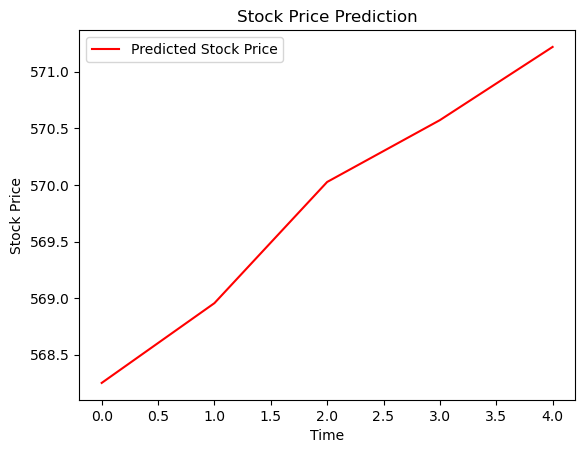

In [58]:
sp.weekly_prediction_graph(weekly_result)

<AxesSubplot:>

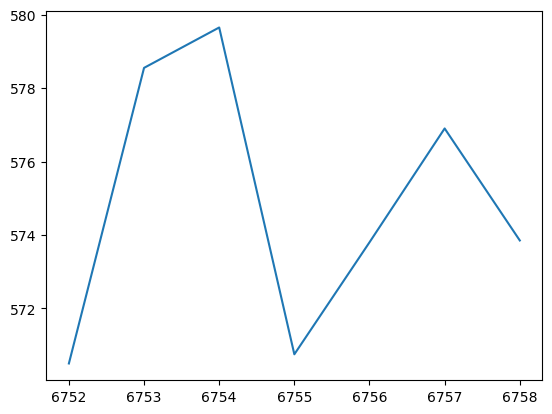

In [60]:
df.iloc[-21:-14, 4:5]['Close'].plot()
# sp.real_data_graph(df.iloc[-101:-96, 4:5].values)

In [19]:
sp.run_daily().flatten()

1/1 [==============================] - 0s 24ms/step


array([463.25616], dtype=float32)

In [20]:
df.iloc[-10]

Date         2022-11-10
Open         613.099976
High         615.099976
Low          602.200012
Close            605.75
Adj Close        605.75
Volume       11618405.0
Name: 6763, dtype: object

In [21]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,18.691147,18.978922,18.540184,18.823240,12.651093,43733533.0
1,1996-01-02,18.894005,18.964767,17.738192,18.224106,12.248409,56167280.0
2,1996-01-03,18.327892,18.568489,17.643839,17.738192,11.921828,68296318.0
3,1996-01-04,17.502312,17.832542,17.223972,17.676863,11.880607,86073880.0
4,1996-01-05,17.738192,17.785366,17.459852,17.577793,11.814024,76613039.0
...,...,...,...,...,...,...,...
6768,2022-11-17,599.099976,602.750000,596.150024,599.049988,599.049988,8167131.0
6769,2022-11-18,601.000000,605.750000,597.150024,602.700012,602.700012,12933675.0
6770,2022-11-21,602.099976,602.099976,595.349976,598.099976,598.099976,7412419.0
6771,2022-11-22,598.150024,600.700012,596.150024,599.099976,599.099976,8048595.0


In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
from modelTesting import PmTesting
import datetime

In [24]:
df_testmodel = df[df['Date'] > datetime.datetime(2022, 1, 1)]

In [25]:
len(df_testmodel)

221

In [26]:
pmt = PmTesting(model,df_testmodel)

In [27]:
p_price = pmt.test_model()

6/6 [==============================] - 0s 15ms/step


In [28]:
p_price.shape

(161, 1)

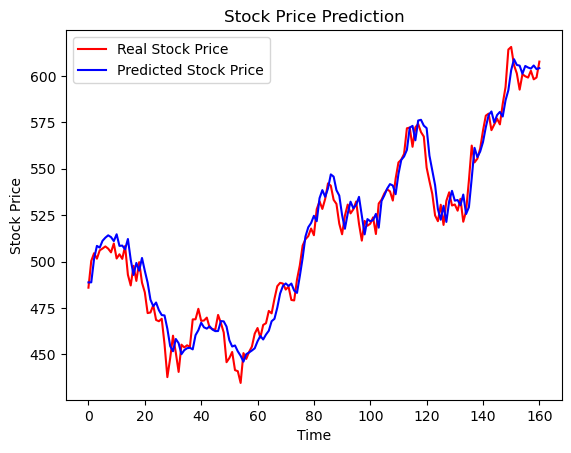

In [29]:
pmt.real_v_predicted_graph(p_price)

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

1/1 [==============================] - 0s 22ms/step


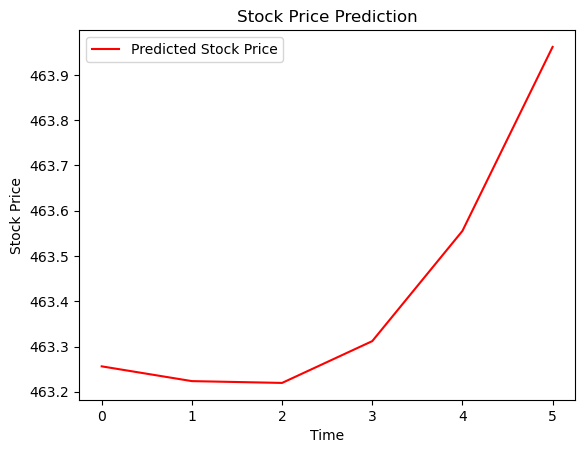

In [34]:
from stock_prediction import StockPrediction
sp = StockPrediction(model, df_test)
sp.long_prediction_graph(6)

In [32]:
sp.run_daily()

1/1 [==============================] - 0s 22ms/step


array([[463.25616]], dtype=float32)

In [47]:
accuracy =0
actual =  df.iloc[-101:-96, 4:5].values
accuracy = abs((weekly_result[-1] - actual[-1])/ actual[-1])
accuracy = (1- accuracy)*100
accuracy 

array([97.91010194])

In [48]:
weekly_result, actual

(array([[463.25616],
        [463.22354],
        [463.21954],
        [463.3119 ],
        [463.5554 ]], dtype=float32),
 array([[464.25    ],
        [459.100006],
        [465.899994],
        [466.850006],
        [473.450012]]))